###Package Loading

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

###Load in datasets

In [483]:
df = pd.read_csv("BankChurners.csv")
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [484]:
df2 = pd.read_csv("digital_marketing_campaign_dataset.csv")
print(df2.columns)

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')


#Data preprocessing

###Data transformation for BankChurners.csv

In [485]:
#Binning Age
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)
print(df['Age_Group'].head())

0    40-50
1    40-50
2    50-60
3    30-40
4    30-40
Name: Age_Group, dtype: category
Categories (5, object): ['18-30' < '30-40' < '40-50' < '50-60' < '60+']


In [486]:
#Income category
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'], ordered=True)
#Inspect
print(df['Income_Category'].unique())

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +']


In [487]:
print(df['Education_Level'].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [488]:
#Education Level
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=['Uneducated','High School','College' ,'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'], ordered=True)
#Inspect
print(df['Education_Level'].unique())

['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' <
                         'Doctorate' < 'Unknown']


###Data transformation for DigitalMarketing.csv

In [489]:
#Removing null
df2 = df2.dropna()
print(df2.shape)

(8000, 20)


In [490]:
#Binning Age
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df2['Age_Group'] = pd.cut(df2['Age'], bins=bins, labels=labels)
print(df2['Age_Group'].head())

0    50-60
1      60+
2    40-50
3    30-40
4    50-60
Name: Age_Group, dtype: category
Categories (5, object): ['18-30' < '30-40' < '40-50' < '50-60' < '60+']


In [491]:
print(max(df2['Income']))

149986


In [492]:
#Binning Income
bins = [0, 40000, 60000, 80000, 120000, 150000]
labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df2['Income_Category'] = pd.cut(df2['Income'], bins=bins, labels=labels)
print(df2['Income_Category'].head())

0         $120K +
1     $40K - $60K
2    $80K - $120K
3     $40K - $60K
4    $80K - $120K
Name: Income_Category, dtype: category
Categories (5, object): ['Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +']


In [493]:
#Standardise gender
df2['Gender'] = df2['Gender'] = df2['Gender'].replace(['Male', 'Female'], ['M', 'F'])
print(df2['Gender'].head())

0    F
1    M
2    F
3    F
4    F
Name: Gender, dtype: object


####Inspecting the data structure we have for online campaign dataset

In [494]:
print(df2[['Age_Group','Income_Category','Gender']].value_counts())

Age_Group  Income_Category  Gender
18-30      $80K - $120K     F         332
40-50      $80K - $120K     F         306
30-40      $80K - $120K     F         294
50-60      $80K - $120K     F         276
60+        $80K - $120K     F         275
18-30      $80K - $120K     M         238
           $120K +          F         230
60+        $120K +          F         228
40-50      $120K +          F         221
30-40      $120K +          F         221
50-60      $120K +          F         219
40-50      $80K - $120K     M         191
50-60      $80K - $120K     M         187
60+        $80K - $120K     M         176
30-40      $80K - $120K     M         174
18-30      $60K - $80K      F         170
30-40      $40K - $60K      F         164
18-30      $40K - $60K      F         159
           $120K +          M         157
40-50      $60K - $80K      F         154
30-40      $60K - $80K      F         153
40-50      Less than $40K   F         153
18-30      Less than $40K   F         150

In [495]:
df['Card_Category'] = pd.Categorical(df['Card_Category'], categories=['Blue','Silver','Gold', 'Platinum'], ordered=True)
#Inspect
print(df['Card_Category'].unique())

['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue' < 'Silver' < 'Gold' < 'Platinum']


####Campaign channels and types

In [496]:
#Synthesise the data for Categorical variables
##Inspect the data structure in df3
categorical = ['CampaignChannel','CampaignType']
for col in categorical:
    print(df2[col].unique())

['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
['Awareness' 'Retention' 'Conversion' 'Consideration']


Note:
1. PPC - Pay per click.  In PPC, you select an advertising platform, create ads, set your target demographic, and launch a campaign for a certain amount of time. (Source: https://nuoptima.com/insights/ppc-for-banks)
2. SEO - search engine optimisation. By optimising a bank's website with relevant keywords, meta tags, and quality content, SEO ensures that the website is easily discoverable by search engines. This, in turn, improves the website's visibility and increases the chances of attracting organic traffic. (Source: https://searchengineland.com/guide/what-is-seo)
3. Referral marketing: Referral marketing is a marketing strategy that uses word of mouth and personal recommendations to grow a business's customer base. (Source: https://www.indeed.com/career-advice/career-development/referral-marketing)

In [497]:
#Fill in data in df
Campaign_Channel = ['Social Media' ,'Email' ,'PPC' ,'Referral' ,'SEO']
df['Campaign_Channel'] = np.random.choice(Campaign_Channel, size=len(df))
print(df[['Campaign_Channel']].head(5))

  Campaign_Channel
0     Social Media
1         Referral
2         Referral
3     Social Media
4         Referral


In [498]:
#Campaign_Type
Campaign_Type = ['Awareness' ,'Retention' ,'Conversion' ,'Consideration']
df['CampaignType'] = np.random.choice(Campaign_Type, size=len(df))
print(df[['CampaignType']].head(5))

    CampaignType
0  Consideration
1      Retention
2      Retention
3      Awareness
4      Awareness


In [499]:
#Campaign_Channel
Campaign_Channel = ['Social Media' ,'Email' ,'PPC' ,'Referral' ,'SEO']
df['CampaignChannel'] = np.random.choice(Campaign_Channel, size=len(df))
print(df[['CampaignChannel']].head(5))

  CampaignChannel
0    Social Media
1             SEO
2             SEO
3    Social Media
4             SEO


In [500]:
#Type of campaign with ad spend and conversion rate
print(df2[['Age_Group','CampaignChannel','CampaignType']].value_counts())

Age_Group  CampaignChannel  CampaignType 
18-30      Email            Conversion       111
                            Awareness        103
           Referral         Awareness        101
30-40      Referral         Retention         99
50-60      Referral         Conversion        99
                                            ... 
60+        Social Media     Consideration     60
30-40      SEO              Retention         60
60+        Social Media     Retention         60
           Email            Awareness         58
           Social Media     Conversion        58
Name: count, Length: 100, dtype: int64


####Inspecting Adspend data

In [501]:
##Adspend
print("Adspend data")
adspend_str = df2.groupby(['CampaignChannel', 'CampaignType'])['AdSpend'].agg(['mean', 'max', 'min', 'std']).reset_index()
print(adspend_str.round(2))

Adspend data
   CampaignChannel   CampaignType     mean      max     min      std
0            Email      Awareness  4881.17  9988.28  154.09  2730.15
1            Email  Consideration  4968.12  9987.93  132.38  2782.98
2            Email     Conversion  5169.92  9997.91  119.42  2856.45
3            Email      Retention  5204.59  9961.13  169.11  2758.44
4              PPC      Awareness  4992.21  9965.89  100.67  2823.81
5              PPC  Consideration  5003.27  9986.86  100.05  2933.68
6              PPC     Conversion  4827.32  9997.35  126.34  2971.77
7              PPC      Retention  5008.45  9981.70  160.35  2777.45
8         Referral      Awareness  5151.42  9997.00  176.77  2822.56
9         Referral  Consideration  5004.18  9983.98  100.97  2818.38
10        Referral     Conversion  5002.67  9992.48  114.50  2842.99
11        Referral      Retention  4977.91  9933.21  126.05  2866.23
12             SEO      Awareness  5132.00  9974.52  121.39  2820.37
13             SEO  C

####Inspecting conversion rate data

In [502]:
print("Conversion rate data")
conversion_str = df2.groupby(['CampaignChannel', 'CampaignType'])['ConversionRate'].agg(['mean', 'max', 'min', 'std']).reset_index()
print(conversion_str.round(5))

Conversion rate data
   CampaignChannel   CampaignType     mean      max      min      std
0            Email      Awareness  0.10420  0.19999  0.01010  0.05458
1            Email  Consideration  0.10668  0.19971  0.01062  0.05490
2            Email     Conversion  0.10656  0.19878  0.01027  0.05538
3            Email      Retention  0.10166  0.19931  0.01067  0.05487
4              PPC      Awareness  0.10869  0.19973  0.01080  0.05343
5              PPC  Consideration  0.10299  0.19935  0.01006  0.05288
6              PPC     Conversion  0.10099  0.19961  0.01009  0.05700
7              PPC      Retention  0.10410  0.19936  0.01027  0.05568
8         Referral      Awareness  0.10521  0.19959  0.01012  0.05504
9         Referral  Consideration  0.09995  0.19944  0.01010  0.05649
10        Referral     Conversion  0.10294  0.19994  0.01019  0.05316
11        Referral      Retention  0.10392  0.19967  0.01002  0.05381
12             SEO      Awareness  0.09817  0.19925  0.01046  0.05577

As our target is to determine the ROI for *different* marketing strategies, we need to impose the data structure onto the main BankChurner dataset according to their mean and standard deviation (assuming normal distribution).

#####Synthetic data for adspend

In [503]:
# Example existing DataFrame (100,000 rows)

# The original adspend_df
adspend_df = pd.DataFrame({
    'CampaignChannel': ['Email', 'Email', 'Email', 'Email', 'PPC', 'PPC', 'PPC', 'PPC',
                        'Referral', 'Referral', 'Referral', 'Referral', 'SEO', 'SEO',
                        'SEO', 'SEO', 'Social Media', 'Social Media', 'Social Media',
                        'Social Media'],
    'CampaignType': ['Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention'],
    'mean': [4881.17, 4968.12, 5169.92, 5204.59, 4992.21, 5003.27, 4827.32, 5008.45,
             5151.42, 5004.18, 5002.67, 4977.91, 5132.00, 4944.59, 4927.46, 4971.80,
             5183.63, 4880.37, 4862.52, 4937.84],
    'std': [2730.15, 2782.98, 2856.45, 2758.44, 2823.81, 2933.68, 2971.77, 2777.45,
             2822.56, 2818.38, 2842.99, 2866.23, 2820.37, 2947.85, 2873.43, 2867.50,
             2841.00, 2791.32, 2861.63, 2757.57]
})

# Merge existing_df with adspend_df to get mean and std
df = df.merge(adspend_df[['CampaignChannel', 'CampaignType', 'mean', 'std']],
                               on=['CampaignChannel', 'CampaignType'],
                               how='left')

# Generate synthetic data using normal distribution
np.random.seed(42)  # for reproducibility
df['AdSpend'] = np.random.normal(df['mean'], df['std'])
df.drop(['mean', 'std'], axis=1, inplace=True)

# Display the result
print(df[['CampaignChannel', 'CampaignType', 'AdSpend']].head())


  CampaignChannel   CampaignType      AdSpend
0    Social Media  Consideration  6266.858150
1             SEO      Retention  4575.327116
2             SEO      Retention  6829.046883
3    Social Media      Awareness  9510.557822
4             SEO      Awareness  4471.600847


#####Synthetic data for conversion rate

In [504]:
import pandas as pd

# Creating the conversion rate data DataFrame
conversion_rate_df = pd.DataFrame({
    'CampaignChannel': ['Email', 'Email', 'Email', 'Email',
                        'PPC', 'PPC', 'PPC', 'PPC',
                        'Referral', 'Referral', 'Referral', 'Referral',
                        'SEO', 'SEO', 'SEO', 'SEO',
                        'Social Media', 'Social Media', 'Social Media', 'Social Media'],
    'CampaignType': ['Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention',
                     'Awareness', 'Consideration', 'Conversion', 'Retention'],
    'mean': [0.10420, 0.10668, 0.10656, 0.10166,
             0.10869, 0.10299, 0.10099, 0.10410,
             0.10521, 0.09995, 0.10294, 0.10392,
             0.09817, 0.11009, 0.10182, 0.10445,
             0.10528, 0.10612, 0.11330, 0.10162],
    'max': [0.19999, 0.19971, 0.19878, 0.19931,
             0.19973, 0.19935, 0.19961, 0.19936,
             0.19959, 0.19944, 0.19994, 0.19967,
             0.19925, 0.19969, 0.19999, 0.19967,
             0.19930, 0.19856, 0.19989, 0.19844],
    'min': [0.01010, 0.01062, 0.01027, 0.01067,
             0.01080, 0.01006, 0.01009, 0.01027,
             0.01012, 0.01010, 0.01019, 0.01002,
             0.01046, 0.01002, 0.01013, 0.01093,
             0.01038, 0.01019, 0.01100, 0.01038],
    'std': [0.05458, 0.05490, 0.05538, 0.05487,
             0.05343, 0.05288, 0.05700, 0.05568,
             0.05504, 0.05649, 0.05316, 0.05381,
             0.05577, 0.05493, 0.05613, 0.05336,
             0.05435, 0.05495, 0.05462, 0.05518]
})

# Merge existing_df with adspend_df to get mean and std
df = df.merge(conversion_rate_df[['CampaignChannel', 'CampaignType', 'mean', 'std']],
                               on=['CampaignChannel', 'CampaignType'],
                               how='left')

# Generate synthetic data using normal distribution
np.random.seed(42)  # for reproducibility
df['ConversionRate'] = np.random.normal(df['mean'], df['std'])
df.drop(['mean', 'std'], axis=1, inplace=True)

# Display the result
print(df[['CampaignChannel', 'CampaignType', 'ConversionRate']].head())

  CampaignChannel   CampaignType  ConversionRate
0    Social Media  Consideration        0.133414
1             SEO      Retention        0.097072
2             SEO      Retention        0.139011
3    Social Media      Awareness        0.188057
4             SEO      Awareness        0.085111


###Calculating ROI

1.Core formula:

$ Marketing ROI  = \dfrac{Sales Growth - Marketing Cost}{Marketing Cost} $


It’s important to note, however, that this formula makes the assumption that
all sales growth is tied to marketing efforts.


2.Realistic view:
$ Marketing ROI = \dfrac{Sales Growth - Organic Sales Growth - Marketing Cost}{Marketing Cost} $


*Source: https://www.marketingevolution.com/marketing-essentials/marketing-roi*

###Assumptions for bank's sales growth

In terms of credit card, one of a major income for bank is interest rate. This is because the interest earned on deposit is usually greater than interest repayed to depositors.

Assumption:
1. average interest earned on deposit by bank: 4.5%
2. Average interest paid to depositors: 1.5%

(Generated by ChatGPT. Prompt: Can you give me an estimate of the average interest earned on deposit by bank and average interest paid to depositors for a Singapore bank in 2024?)


In [505]:
#Calculating the sales growth:
df['Total_Indiv'] = df['Months_on_book']*df['Avg_Open_To_Buy']*(0.045-0.015)

#Inspect
print(df['Total_Indiv'].head(4))


0    13939.38
1     9757.44
2     3691.44
3      811.92
Name: Total_Indiv, dtype: float64


In [506]:
#Conversion rates according to income and card category
average_result = df.groupby(['Income_Category', 'Card_Category'])['Avg_Open_To_Buy'].mean().reset_index()

print(average_result)

   Income_Category Card_Category  Avg_Open_To_Buy
0   Less than $40K          Blue      2188.948722
1   Less than $40K        Silver     11022.015385
2   Less than $40K          Gold     14572.875000
3   Less than $40K      Platinum     14999.750000
4      $40K - $60K          Blue      3415.831701
5      $40K - $60K        Silver     16345.767677
6      $40K - $60K          Gold     21095.866667
7      $40K - $60K      Platinum     23388.000000
8      $60K - $80K          Blue      7593.360330
9      $60K - $80K        Silver     28536.739583
10     $60K - $80K          Gold     31972.310345
11     $60K - $80K      Platinum     32856.750000
12    $80K - $120K          Blue     12725.294337
13    $80K - $120K        Silver     33315.700855
14    $80K - $120K          Gold     33350.285714
15    $80K - $120K      Platinum     32889.000000
16         $120K +          Blue     16700.732558
17         $120K +        Silver     32772.616667
18         $120K +          Gold     32025.944444


<ipython-input-506-d638b25f0633>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_result = df.groupby(['Income_Category', 'Card_Category'])['Avg_Open_To_Buy'].mean().reset_index()


Let us further inspect the relationship with income and card category

<ipython-input-507-78809d6cf601>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = average_result.groupby(['Income_Category', 'Card_Category'], as_index=False)['Avg_Open_To_Buy'].mean()


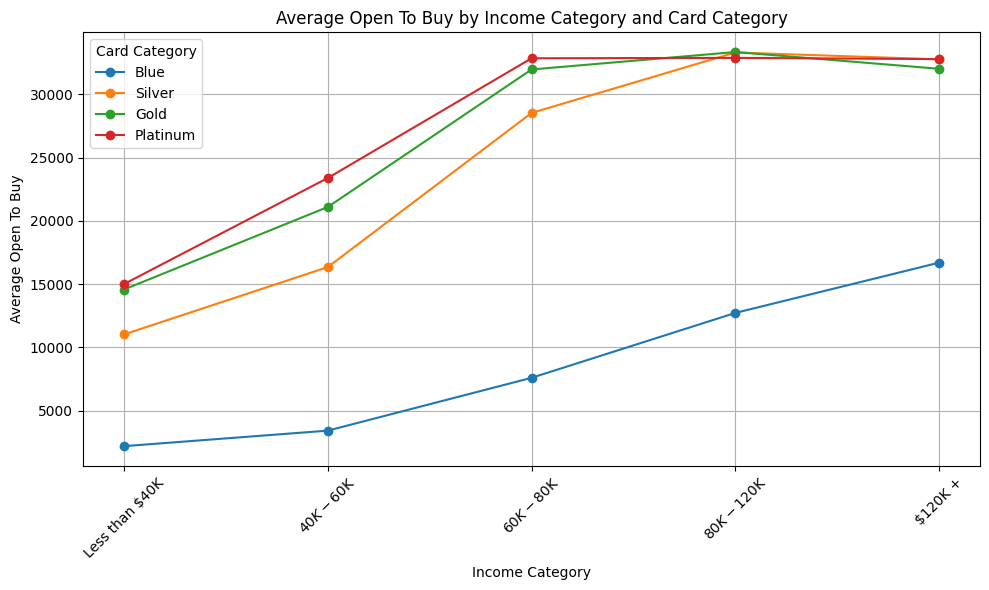

In [507]:
# Grouping to handle duplicates by taking the mean
grouped_df = average_result.groupby(['Income_Category', 'Card_Category'], as_index=False)['Avg_Open_To_Buy'].mean()

# Pivot the DataFrame
pivot_df = grouped_df.pivot(index='Income_Category', columns='Card_Category', values='Avg_Open_To_Buy')

plt.figure(figsize=(10, 6))

for card in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[card], marker='o', label=card)

plt.title('Average Open To Buy by Income Category and Card Category')
plt.xlabel('Income Category')
plt.ylabel('Average Open To Buy')
plt.xticks(rotation=45)
plt.legend(title='Card Category')
plt.grid()
plt.tight_layout()
plt.show()

In contrast, education does not seem to have a very large impact on average open to buy

In [508]:
average_result2 = df.groupby(['Education_Level', 'Card_Category'])['Avg_Open_To_Buy'].mean().reset_index()

print(average_result2)

   Education_Level Card_Category  Avg_Open_To_Buy
0       Uneducated          Blue      6633.658447
1       Uneducated        Silver     23155.231707
2       Uneducated          Gold     26477.181818
3       Uneducated      Platinum     33352.333333
4      High School          Blue      6246.013136
5      High School        Silver     24108.704082
6      High School          Gold     28863.038462
7      High School      Platinum     13725.000000
8          College          Blue      6129.121383
9          College        Silver     25359.689655
10         College          Gold     27643.333333
11         College      Platinum              NaN
12        Graduate          Blue      6057.219283
13        Graduate        Silver     23946.491892
14        Graduate          Gold     25550.138889
15        Graduate      Platinum     31131.750000
16   Post-Graduate          Blue      6185.584454
17   Post-Graduate        Silver     23768.718750
18   Post-Graduate          Gold     33291.600000


<ipython-input-508-ba0b7e96fd4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_result2 = df.groupby(['Education_Level', 'Card_Category'])['Avg_Open_To_Buy'].mean().reset_index()


<ipython-input-509-2ad185ff59f2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df2 = average_result2.groupby(['Education_Level', 'Card_Category'], as_index=False)['Avg_Open_To_Buy'].mean()


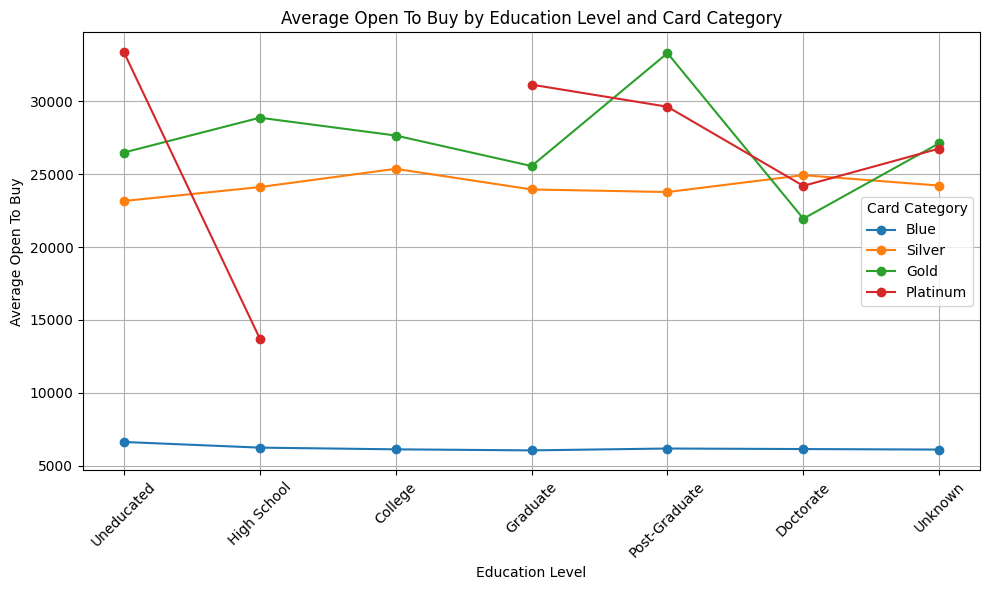

In [509]:
# Grouping to handle duplicates by taking the mean
grouped_df2 = average_result2.groupby(['Education_Level', 'Card_Category'], as_index=False)['Avg_Open_To_Buy'].mean()

# Pivot the DataFrame
pivot_df = grouped_df2.pivot(index='Education_Level', columns='Card_Category', values='Avg_Open_To_Buy')

plt.figure(figsize=(10, 6))

for card in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[card], marker='o', label=card)

plt.title('Average Open To Buy by Education Level and Card Category')
plt.xlabel('Education Level')
plt.ylabel('Average Open To Buy')
plt.xticks(rotation=45)
plt.legend(title='Card Category')
plt.grid()
plt.tight_layout()
plt.show()

From this graph, we can see that average open to buy is positively correlated with both income and card category.

Thus, in our evaluation, we have recognised with reasoning that the social connections for customers with different income and card categories are different, they tend to meet people with similar deposit habits.

Hence, we need to take into account their different social connection levels and the new customers they are able to bring in have different spending capabilities as well.

We assume that the new customers they brought (including the original churned customers who decided to continue), have the same level of spending abilities.

In [510]:
average_result = df.groupby('Card_Category')['Avg_Open_To_Buy'].mean().reset_index()
print(average_result)
average_result.rename(columns={'Avg_Open_To_Buy': 'Avg_Open_To_Buy_Avg'}, inplace=True)
df = df.merge(average_result, on='Card_Category')

  Card_Category  Avg_Open_To_Buy
0          Blue      6205.967794
1        Silver     24071.706306
2          Gold     27072.051724
3      Platinum     29015.500000


<ipython-input-510-e60ea4c2ce19>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_result = df.groupby('Card_Category')['Avg_Open_To_Buy'].mean().reset_index()


In [511]:
#According to the formulas
df['Conversion_Value'] = df['Avg_Open_To_Buy_Avg'] * df['ConversionRate']
df['Total_Customer_Growth'] = df['Total_Indiv']+df['Conversion_Value']

#Inspect
print(df[['Conversion_Value','Total_Customer_Growth']].head(4))

   Conversion_Value  Total_Customer_Growth
0        827.965735           14767.345735
1        602.427052           10359.867052
2        862.695681            4554.135681
3       1167.073654            1978.993654


####Macro-ROI

ROI summary for all methods

In [512]:
grouped_sums = df.groupby(['CampaignType', 'CampaignChannel'])[['Total_Customer_Growth', 'AdSpend']].sum().reset_index()
print(grouped_sums)

     CampaignType CampaignChannel  Total_Customer_Growth       AdSpend
0       Awareness           Email           4.611333e+06  2.516478e+06
1       Awareness             PPC           4.030625e+06  2.504282e+06
2       Awareness        Referral           4.584675e+06  2.772707e+06
3       Awareness             SEO           4.465469e+06  2.721429e+06
4       Awareness    Social Media           4.473053e+06  2.780212e+06
5   Consideration           Email           4.558328e+06  2.520695e+06
6   Consideration             PPC           4.623784e+06  2.529921e+06
7   Consideration        Referral           4.583768e+06  2.485258e+06
8   Consideration             SEO           4.415357e+06  2.488767e+06
9   Consideration    Social Media           4.710765e+06  2.554724e+06
10     Conversion           Email           4.840462e+06  2.733030e+06
11     Conversion             PPC           4.948969e+06  2.467722e+06
12     Conversion        Referral           4.289706e+06  2.552537e+06
13    

In [513]:
grouped_sums['ROI'] = (grouped_sums['Total_Customer_Growth'] - grouped_sums['AdSpend']) / grouped_sums['AdSpend']
macro_roi = grouped_sums.drop(columns = ['Total_Customer_Growth','AdSpend'])
macro_roi = macro_roi.sort_values(by='ROI', ascending=False).reset_index(drop=True)
print(macro_roi)

     CampaignType CampaignChannel       ROI
0      Conversion             PPC  1.005480
1       Retention             PPC  0.919814
2       Retention             SEO  0.879293
3   Consideration        Referral  0.844383
4   Consideration    Social Media  0.843943
5       Retention        Referral  0.840611
6       Awareness           Email  0.832455
7   Consideration             PPC  0.827640
8   Consideration           Email  0.808362
9      Conversion    Social Media  0.792790
10  Consideration             SEO  0.774114
11     Conversion           Email  0.771097
12      Retention    Social Media  0.760150
13     Conversion             SEO  0.731189
14     Conversion        Referral  0.680566
15      Awareness        Referral  0.653501
16      Retention           Email  0.646002
17      Awareness             SEO  0.640855
18      Awareness             PPC  0.609493
19      Awareness    Social Media  0.608889


####Micro-ROI

ROI for each customer campaign

In [514]:
#Find ROI
df['ROI'] = (df['Total_Customer_Growth'] - df['AdSpend'])/df['AdSpend']
print(df['ROI'].head(20))

0      1.356419
1      1.264290
2     -0.333123
3     -0.791916
4     -0.217444
5     -0.224520
6      4.188475
7      2.614524
8      4.984082
9      0.801957
10     0.483985
11     2.536706
12     1.378423
13   -19.084105
14   -46.574755
15     0.138966
16    15.789669
17     1.178532
18    -0.428832
19    13.556567
Name: ROI, dtype: float64


###Inspecting the combined dataset df

####Encoding categorical variables

In [515]:
categorical = ['Income_Category', 'Attrition_Flag', 'Gender', 'Age_Group','Education_Level','Marital_Status', 'Card_Category', 'CampaignChannel', 'CampaignType']
for col in categorical:
    df[col] = pd.Categorical(df[col]).codes

#Inspect
print(df[categorical].head(4))

#Drop duplicate
df = df.drop('Campaign_Channel', axis=1)


   Income_Category  Attrition_Flag  Gender  Age_Group  Education_Level  \
0                2               1       1          2                1   
1                0               1       0          2                3   
2                3               1       1          3                3   
3                0               1       0          1                1   

   Marital_Status  Card_Category  CampaignChannel  CampaignType  
0               1              0                4             1  
1               2              0                3             3  
2               1              0                3             3  
3               3              0                4             0  


In [516]:
correlation_matrix = df.corr()
roi_correlation = correlation_matrix['ROI']
print(roi_correlation)

CLIENTNUM                                                                                                                             0.005826
Attrition_Flag                                                                                                                       -0.006535
Customer_Age                                                                                                                         -0.012224
Gender                                                                                                                               -0.008767
Dependent_count                                                                                                                       0.011186
Education_Level                                                                                                                      -0.001877
Marital_Status                                                                                                                       -0.007199

###Feature Selection with Random Forest Model

In [517]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [518]:
X = df.drop('ROI', axis=1)
y = df['ROI']

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [520]:
# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [521]:
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 570.1184339965387


In [522]:
importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                              Feature  Importance
26                                            AdSpend    0.845279
30                                   Conversion_Value    0.025203
27                                     ConversionRate    0.021444
31                              Total_Customer_Growth    0.015109
15                                    Avg_Open_To_Buy    0.012002
28                                        Total_Indiv    0.011960
20                              Avg_Utilization_Ratio    0.009669
22  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...    0.007552
13                                       Credit_Limit    0.005103
25                                    CampaignChannel    0.004899
7                                     Income_Category    0.004611
19                                Total_Ct_Chng_Q4_Q1    0.004466
21  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...    0.004163
2                                        Customer_Age    0.003948
14        

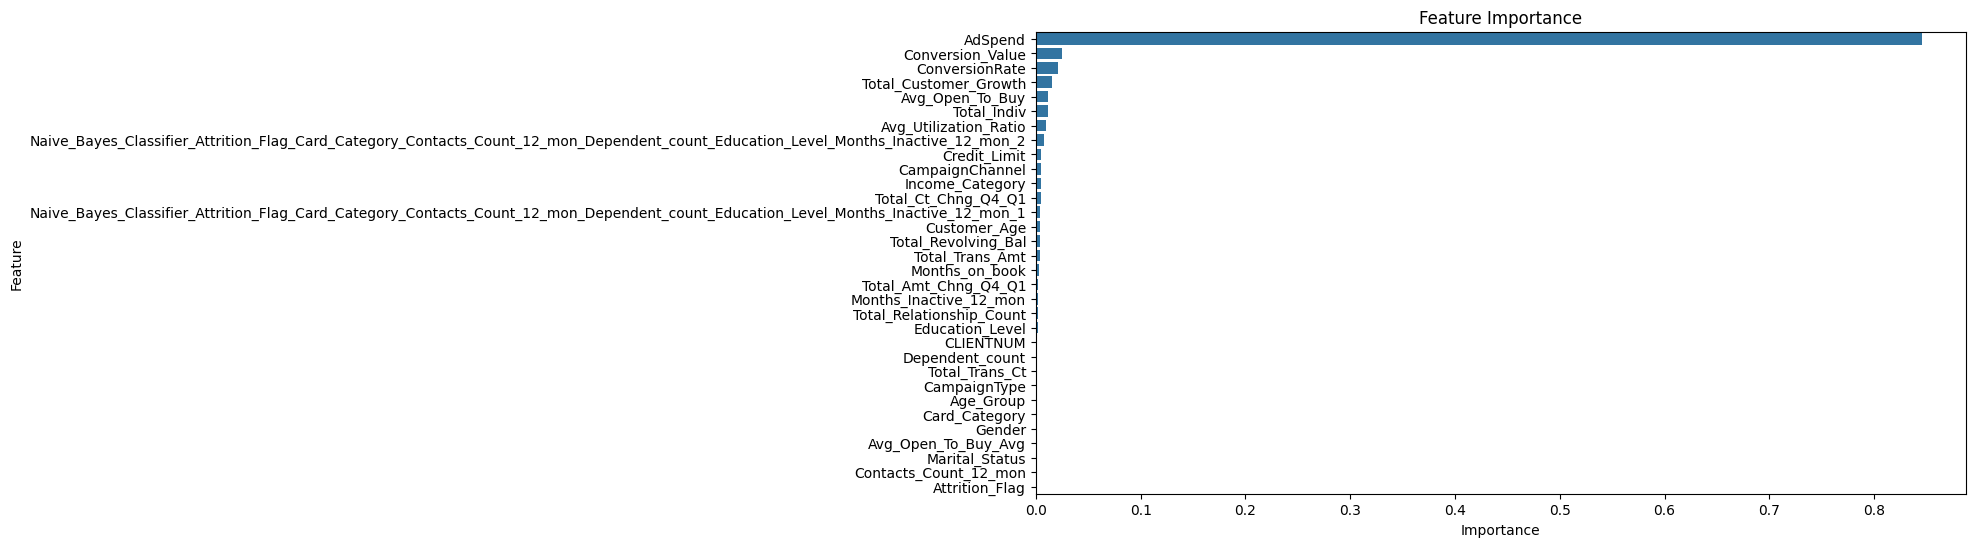

In [523]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

- As we already know that CLENTNUM is a unique identifier, it has zero correlation with ROI.
- Hence, we take the columns above it in the importance chart
- Note that Campaign Type (ie. the purpose of campaign) has insignificant importance. This could be because there are not much differentiation in terms of methods used for different purposes of marketing. For example, although the purposes are different, they might be using the same styles of poster, resulting in no much difference in terms of results
- Hence, only Campaign Channel would be considered onwards

In [524]:
impt_col = importance_df['Feature'][:21]
print(impt_col)

26                                              AdSpend
30                                     Conversion_Value
27                                       ConversionRate
31                                Total_Customer_Growth
15                                      Avg_Open_To_Buy
28                                          Total_Indiv
20                                Avg_Utilization_Ratio
22    Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...
13                                         Credit_Limit
25                                      CampaignChannel
7                                       Income_Category
19                                  Total_Ct_Chng_Q4_Q1
21    Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...
2                                          Customer_Age
14                                  Total_Revolving_Bal
17                                      Total_Trans_Amt
9                                        Months_on_book
16                                 Total_Amt_Chn

After feature selection, we are left with 20 variables that are of higher importance to the model

In [525]:
from sklearn.metrics import mean_squared_error, r2_score

In [526]:
# Initialize a dictionary to hold models for each CampaignChannel
models = {}

# Split the data by CampaignChannel and train a model for each
for channel in df['CampaignChannel'].unique():
    channel_data = df[df['CampaignChannel'] == channel]

    # Define features and target
    X = channel_data[impt_col]
    y = channel_data['ROI']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Store the model in the dictionary
    models[channel] = model

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Campaign Channel: {channel}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')

# Now you can use the models to predict ROI for new customer data
def predict_roi_for_customer(customer_data):
    predictions = {}
    for channel, model in models.items():
        # Prepare the customer data (ensure it's in the same format as your training data)
        customer_df = pd.DataFrame([customer_data])
        customer_df = pd.get_dummies(customer_df, columns=['Income_Category'], drop_first=True)

        # Ensure the customer_df has the same columns as the model's training data
        # Add missing columns if necessary (fill with zeros)
        for col in X.columns:
            if col not in customer_df.columns:
                customer_df[col] = 0
        customer_df = customer_df[X.columns]  # Reorder to match training data

        # Make prediction
        roi_prediction = model.predict(customer_df)[0]
        predictions[channel] = roi_prediction

    return predictions

# Example customer data (ensure this matches your feature format)
customer_data = {
    'AdSpend': 5000,
    'Conversion_Value': 200,
    'ConversionRate': 0.1,
    'Total_Customer_Growth': 100,
    'Avg_Open_To_Buy': 15000,
    'Total_Indiv': 10,
    'Avg_Utilization_Ratio': 0.4,
    'Credit_Limit': 10000,
    'Income_Category': 0,  # Ensure this matches your categories
    'Total_Ct_Chng_Q4_Q1': 0.05,
    'Customer_Age': 30,
    'Total_Revolving_Bal': 3000,
    'Total_Trans_Amt': 1000,
    'Months_on_book': 12,
    'Total_Amt_Chng_Q4_Q1': 0.02,
    'Months_Inactive_12_mon': 1,
    'Total_Relationship_Count': 3,
    'Education_Level': 1
}

# Predict ROI for the example customer
roi_predictions = predict_roi_for_customer(customer_data)
print(roi_predictions)


Campaign Channel: 4
Mean Squared Error: 1064.071334982069
R-squared: -14.553862772022343

Campaign Channel: 3
Mean Squared Error: 1656282.080739618
R-squared: 0.06329205325305387

Campaign Channel: 0
Mean Squared Error: 15.547941195989948
R-squared: 0.7018945637324705

Campaign Channel: 1
Mean Squared Error: 207.58346117163865
R-squared: 0.5076320731737617

Campaign Channel: 2
Mean Squared Error: 1089.4098625742026
R-squared: 0.2293221485876451

{4: -39.401180460890906, 3: -0.6830180813836685, 0: -0.5102857900507086, 1: -0.3082096747104827, 2: 0.04051444945180558}


Categories:
- Social Media - 0
- Email - 1
- PPC - 2
- Referral - 3
- SEO - 4

Analysis
- From the prediction results above, in terms of model performance from highest to lowest,

$ Social Media > Email > PPC > Referral > SEO $.

- This could indicate the predictability of each Campaign Methods
- Social media and email results are the most predictable. This could be because social media influences people even outside of acquaintance circle. This means that there is a guarantee that most of the times the method is stable and predictive
- emails are usually targeted to individual. Thus, given the individual profiles, it is still easy to predict how the individuals react to the email.
- PPC and referral are harder to evaluate as it involves sharing and words of mouth. Although we assumed that people will mostly share products with acquaintances of similar social classes, it is not always the case, especially in Singapore where meritocracy is practiced and income gaps within a friend circle can be huge.
- SEO in terms of marketing could be inaccurate. This could be because of more people unwilling to share their privacy data when they are browsing. Without their consent, the SEO optimisation system are unable to suggest to them products that they are more interested in, leading to the unpredictability when we do not consider whether their browsing history is used.

Note (Reminder):
1. PPC - Pay per click.  In PPC, you select an advertising platform, create ads, set your target demographic, and launch a campaign for a certain amount of time. (Source: https://nuoptima.com/insights/ppc-for-banks)
2. SEO - search engine optimisation. By optimising a bank's website with relevant keywords, meta tags, and quality content, SEO ensures that the website is easily discoverable by search engines. This, in turn, improves the website's visibility and increases the chances of attracting organic traffic. (Source: https://searchengineland.com/guide/what-is-seo)
3. Referral marketing: Referral marketing is a marketing strategy that uses word of mouth and personal recommendations to grow a business's customer base. (Source: https://www.indeed.com/career-advice/career-development/referral-marketing)

####Improving the accuracy of the model

In [527]:
from sklearn.model_selection import GridSearchCV

For the first model

In [528]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']  # Consider the number of features to consider when looking for the best split
}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=models[0], param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print best parameters and evaluation metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 1009.1508474978849
R-squared: 0.28609953552017364


In [529]:
models[0] = best_model